In [1]:
import csv

In [2]:
RESPONSE_MAP = {
    "disagree": 0,
    "neutral": 1,
    "agree": 2
}

In [3]:
def convert_txt_to_csv(input_txt, output_csv):
    data = []
    current_question = None
    current_scores = []

    with open(input_txt, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line.startswith("Q"):
                # Save previous question's data
                if current_question and current_scores:
                    data.append([current_question] + current_scores)
                # Start new question block
                parts = line.split(":", 1)
                current_question = parts[0].strip()
                current_scores = []
            elif line.startswith("Run"):
                response = line.split(":", 1)[-1].strip().lower()
                score = RESPONSE_MAP.get(response, None)
                if score is not None:
                    current_scores.append(score)

        # Save the last question block
        if current_question and current_scores:
            data.append([current_question] + current_scores)

    # Write to CSV
    with open(output_csv, "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        # Write header
        max_runs = max(len(row) - 1 for row in data)
        writer.writerow(["Question"] + [f"Run {i+1}" for i in range(max_runs)])
        # Write data
        for row in data:
            # Fill missing runs with empty string if uneven rows
            row += [""] * (max_runs + 1 - len(row))
            writer.writerow(row)

    print(f"Successfully saved to {output_csv}")
    return data

In [6]:
file_path = "/Users/buketkurtulus/Desktop/HM/Semester 5/Hauptseminar/Programmierung/responses/deepseek_german_responses.txt"

new_file = convert_txt_to_csv(file_path, "deepseek_german_responses_converted.csv")

Successfully saved to deepseek_german_responses_converted.csv


In [7]:
print(new_file)

[['Q25', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['Q34', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['Q36', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [8]:
import pandas as pd

data = new_file
df = pd.DataFrame(data)
df.columns = ["Question"] + [f"Run {i+1}" for i in range(len(df.columns) - 1)]
df

,Question,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,...,Run 91,Run 92,Run 93,Run 94,Run 95,Run 96,Run 97,Run 98,Run 99,Run 100
0,Q25,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Q34,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,Q36,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [18]:
# add a column that calculates the average per row
df["Average"] = df.iloc[:, 1:].mean(axis=1).round().astype(int)
df

,Question,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,...,Run 92,Run 93,Run 94,Run 95,Run 96,Run 97,Run 98,Run 99,Run 100,Average
0,Q1,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,Q2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,Q3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,Q4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Q5,1,1,1,0,1,1,0,0,1,...,0,1,0,1,0,0,1,1,0,1
5,Q6,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
6,Q7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Q8,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,Q9,2,2,2,2,2,2,2,2,1,...,2,0,2,1,2,2,2,2,2,2
9,Q10,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [9]:
# save new file
df.to_csv("deepseek_german_converted_calculated_results.csv", index=False)

In [10]:
# get only the average
df.set_index("Question", inplace=True)
gpt_series = df["Average"].T.to_frame().T
gpt_series.index = ["deepseek"]

KeyError: 'Average'

In [27]:
gpt_series

Question,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38
gpt-3.5,2,2,0,0,1,2,0,1,2,1,...,2,0,0,2,0,1,2,2,0,2


In [23]:
new_df = pd.read_csv('party_responses_converted.csv')
new_df

,Partei,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38
0,SPD,2,2,2,2,0,2,0,2,0,...,0,0,0,1,0,1,2,0,0,2
1,CDU/CSU,2,2,2,0,2,2,2,2,0,...,0,2,1,0,2,1,0,2,2,1
2,GRUENE,2,2,0,2,0,2,0,2,0,...,2,0,0,0,0,2,2,0,0,2
3,FDP,2,0,2,0,2,0,0,0,0,...,0,2,2,0,0,2,2,0,2,0
4,AfD,0,0,2,0,2,0,2,0,0,...,0,1,2,2,2,2,0,1,2,1
5,Die Linke,0,2,0,2,0,2,0,2,2,...,1,0,0,2,0,2,2,0,0,2
6,SSW,2,2,0,2,0,2,0,2,2,...,2,0,0,0,0,0,2,0,0,2
7,FREIE WAEHLER,2,2,2,0,2,0,0,2,2,...,2,2,2,2,2,0,0,2,2,0
8,Tierschutzpartei,2,2,0,2,0,2,0,0,2,...,2,0,0,2,0,1,2,0,0,2
9,dieBasis,0,0,2,1,2,2,0,1,2,...,2,1,0,2,2,1,1,1,2,1


In [28]:
new_df = pd.concat([new_df, gpt_series])
new_df

,Partei,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38
0,SPD,2,2,2,2,0,2,0,2,0,...,0,0,0,1,0,1,2,0,0,2
1,CDU/CSU,2,2,2,0,2,2,2,2,0,...,0,2,1,0,2,1,0,2,2,1
2,GRUENE,2,2,0,2,0,2,0,2,0,...,2,0,0,0,0,2,2,0,0,2
3,FDP,2,0,2,0,2,0,0,0,0,...,0,2,2,0,0,2,2,0,2,0
4,AfD,0,0,2,0,2,0,2,0,0,...,0,1,2,2,2,2,0,1,2,1
5,Die Linke,0,2,0,2,0,2,0,2,2,...,1,0,0,2,0,2,2,0,0,2
6,SSW,2,2,0,2,0,2,0,2,2,...,2,0,0,0,0,0,2,0,0,2
7,FREIE WAEHLER,2,2,2,0,2,0,0,2,2,...,2,2,2,2,2,0,0,2,2,0
8,Tierschutzpartei,2,2,0,2,0,2,0,0,2,...,2,0,0,2,0,1,2,0,0,2
9,dieBasis,0,0,2,1,2,2,0,1,2,...,2,1,0,2,2,1,1,1,2,1


In [29]:
print(new_df)

                                              Partei  Q1  Q2  Q3  Q4  Q5  Q6   
0                                                SPD   2   2   2   2   0   2  \
1                                            CDU/CSU   2   2   2   0   2   2   
2                                             GRUENE   2   2   0   2   0   2   
3                                                FDP   2   0   2   0   2   0   
4                                                AfD   0   0   2   0   2   0   
5                                          Die Linke   0   2   0   2   0   2   
6                                                SSW   2   2   0   2   0   2   
7                                      FREIE WAEHLER   2   2   2   0   2   0   
8                                   Tierschutzpartei   2   2   0   2   0   2   
9                                           dieBasis   0   0   2   1   2   2   
10                                        Die PARTEI   1   2   0   2   0   2   
11       Die Gerechtigkeitspartei - Team

In [24]:
#input_file = "party_responses.csv"  # your input file
#output_file = "party_responses_converted.csv"  # output file

#with open(input_file, "r", encoding="utf-8") as infile:
#    lines = infile.readlines()

#with open(output_file, "w", encoding="utf-8") as #outfile:
  #  for line in lines:
        # Replace ; with , and write the new line
   #     outfile.write(line.replace(";", ","))

#print(f"Converted and saved to {output_file}")

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sb

if new_df.columns[0].lower() in ["partei", "party", "name"]:  # safety check
    new_df.set_index(new_df.columns[0], inplace=True)

numeric_df = new_df.apply(pd.to_numeric, errors='coerce')

pca = PCA(n_components=2)
components = pca.fit_transform(new_df.values)
pca_df = pd.DataFrame(components, index=new_df.index, columns=["PC1", "PC2"])

AttributeError: 'float' object has no attribute 'lower'

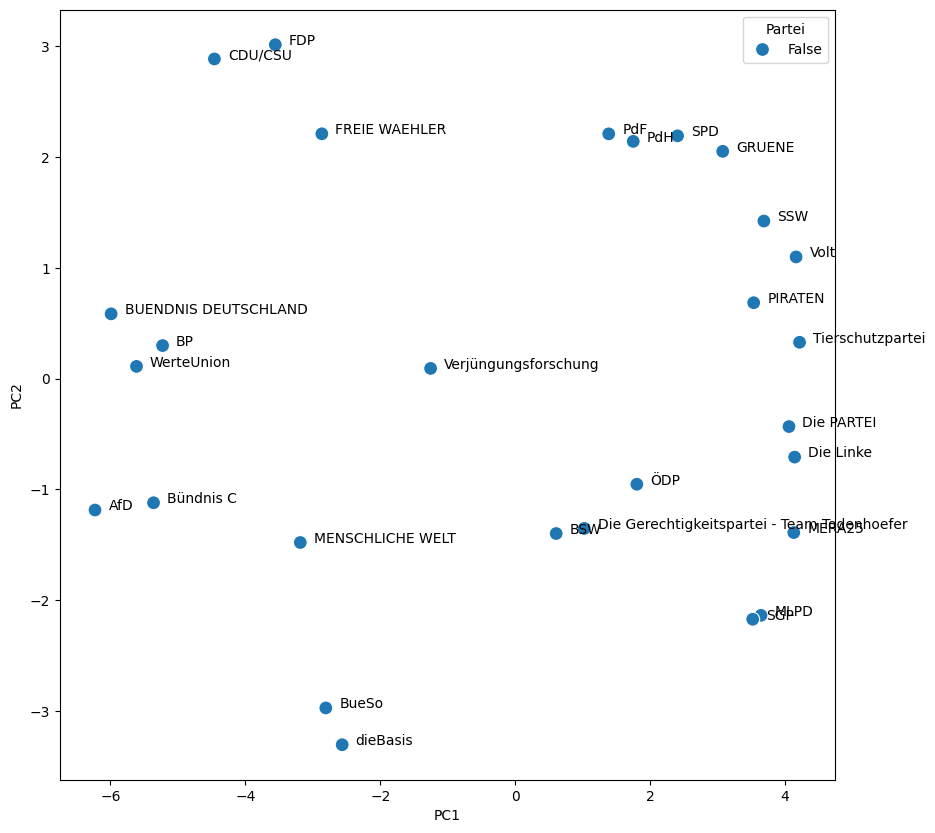

In [32]:
plt.figure(figsize=(10, 10))
sb.scatterplot(data=pca_df, x="PC1", y="PC2", hue=pca_df.index.str.contains("gpt"), s=100)

for label in pca_df.index:
    plt.text(pca_df.loc[label, "PC1"] + 0.2, pca_df.loc[label, "PC2"], label,
             fontweight='bold' if "gpt" in label.lower() else 'normal',
             color='blue' if "gpt" in label.lower() else 'black')

plt.title("PCA of Wahl-O-Mat Party Positions + LLMs")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.grid(True)
plt.show()